In [1]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_path='C:/Users/abhin/sign lang proj/images/test'
test_path='C:/Users/abhin/sign lang proj/images/train'

In [4]:
sze=128  #size of image (128*128)

In [5]:
train_datagen= ImageDataGenerator( rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_batches = train_datagen.flow_from_directory(directory=train_path,
                                               batch_size=10, # number of images to process at a time 
                                               target_size=(sze, sze), # convert all images to be 128 x 128
                                               class_mode="categorical", #classification problem (27 classes)
                                               color_mode="grayscale")
test_batches = test_datagen.flow_from_directory(directory=test_path,
                                                batch_size=10,
                                                target_size=(sze,sze),
                                                class_mode="categorical",
                                                color_mode="grayscale")  

Found 4268 images belonging to 27 classes.
Found 12845 images belonging to 27 classes.


In [10]:
imgs, labels = next(train_batches)

In [24]:
# plots images with labels within jupyter notebook
def plotImages(images_arr):
    fig,axes=plt.subplots(1,10,figsize=(20,20))
    axes=axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

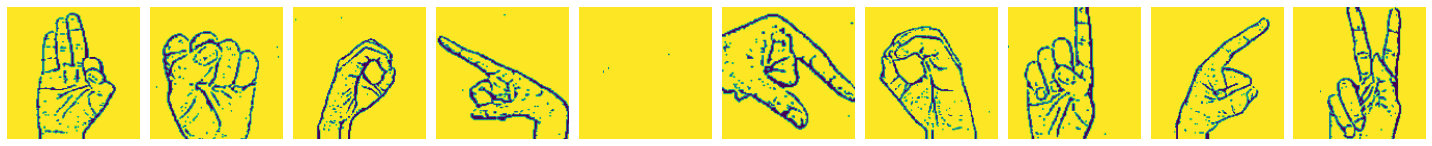

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]


In [25]:
plotImages(imgs)
print(labels)

In [6]:
model=Sequential([
                  Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(sze,sze,1)),
                  MaxPool2D(pool_size=(2,2)),
                  Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
                  MaxPool2D(pool_size=(2,2)),
                  Flatten(),
                  Dense(units=128,activation='relu'),
                  Dense(units=96,activation='relu'),
                  Dense(units=64,activation='relu'),
                  Dense(units=27,activation='softmax')              
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4194432   
_________________________________________________________________
dense_1 (Dense)              (None, 96)                1

In [8]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(x=train_batches,validation_data=test_batches,epochs=10,verbose=2)

Epoch 1/10
427/427 - 82s - loss: 2.7123 - accuracy: 0.2334 - val_loss: 1.3748 - val_accuracy: 0.6000
Epoch 2/10
427/427 - 67s - loss: 1.1176 - accuracy: 0.6753 - val_loss: 0.5970 - val_accuracy: 0.8216
Epoch 3/10
427/427 - 66s - loss: 0.6580 - accuracy: 0.8046 - val_loss: 0.4254 - val_accuracy: 0.8634
Epoch 4/10
427/427 - 67s - loss: 0.4687 - accuracy: 0.8643 - val_loss: 0.2576 - val_accuracy: 0.9207
Epoch 5/10
427/427 - 67s - loss: 0.3651 - accuracy: 0.8887 - val_loss: 0.1822 - val_accuracy: 0.9443
Epoch 6/10
427/427 - 67s - loss: 0.2846 - accuracy: 0.9164 - val_loss: 0.1327 - val_accuracy: 0.9643
Epoch 7/10
427/427 - 67s - loss: 0.2329 - accuracy: 0.9267 - val_loss: 0.0930 - val_accuracy: 0.9748
Epoch 8/10
427/427 - 67s - loss: 0.2031 - accuracy: 0.9388 - val_loss: 0.1322 - val_accuracy: 0.9583
Epoch 9/10
427/427 - 67s - loss: 0.1743 - accuracy: 0.9499 - val_loss: 0.1036 - val_accuracy: 0.9612
Epoch 10/10
427/427 - 67s - loss: 0.1424 - accuracy: 0.9571 - val_loss: 0.1218 - val_accura

In [26]:
#checks first to see if file exists already
#if not, the model is saved 
import os.path
if(os.path.isfile('C:/Users/abhin/sign lang proj/sign_lang_recog_train_model.h5')) is False:
    model.save('C:/Users/abhin/sign lang proj/sign_lang_recog_train_model.h5')

In [27]:
from tensorflow.keras.models import load_model
new_model=load_model('C:/Users/abhin/sign lang proj/sign_lang_recog_train_model.h5')

In [28]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4194432   
_________________________________________________________________
dense_1 (Dense)              (None, 96)                1